# GIS & AIS plots
Using [ETOPO](https://www.ngdc.noaa.gov/mgg/global/)

In [7]:
# Nedded libraries
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.path as mpath

import cmocean as cm


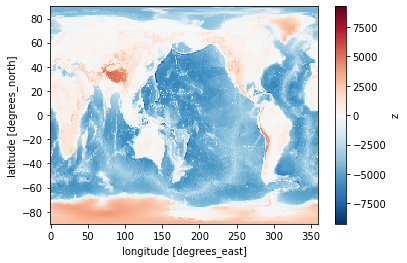

In [15]:
ds=xr.open_dataset('/Users/ccamargo/Documents/github/oceanmass_SLF_local/data/ETOPO1_Ice-180x360.nc')
# ds = ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
# ds = ds.sortby('lon')
ds.z.plot()

## GIS

In [29]:
def plot_gre(lon,lat,z,cmin=0,cmax=1,title='',cmap='viridis',clabel=''):
    polar_stereographic = ccrs.Stereographic(
        central_latitude=90.0,
        central_longitude=-45.0,
        false_easting=0.0,
        false_northing=0.0,
        true_scale_latitude=70.0,
        globe=ccrs.Globe('WGS84')
    )
    
    fig = plt.figure(figsize=(10,10), facecolor='w')
    
    ax = plt.axes(projection=polar_stereographic)
    ax.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
    cp = plt.pcolormesh(lon,lat,z,
                          cmap=cmap,
                          vmin=cmin,vmax=cmax,
                          transform=ccrs.PlateCarree()
                        )
    
    ax.coastlines(resolution='50m', zorder=7)
    ax.gridlines(zorder=8)

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.17, 0.05, 0.67])
    cbar=fig.colorbar(cp, cax=cbar_ax)
    cbar.set_label(label=clabel,size=14, family='serif')
    plt.show()
    return

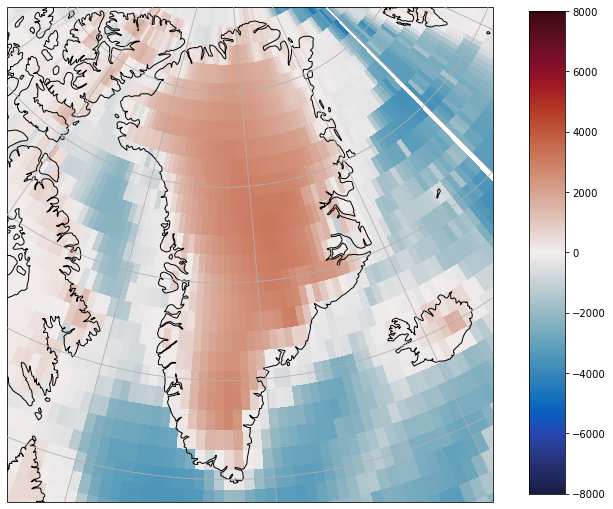

In [30]:
plot_gre(ds.lon,ds.lat,ds.z,
         cmin=-8000,cmax=8000,
         cmap=cm.cm.balance,
        title='Greenland Ice Sheet',
        clabel='Elevation (m)')

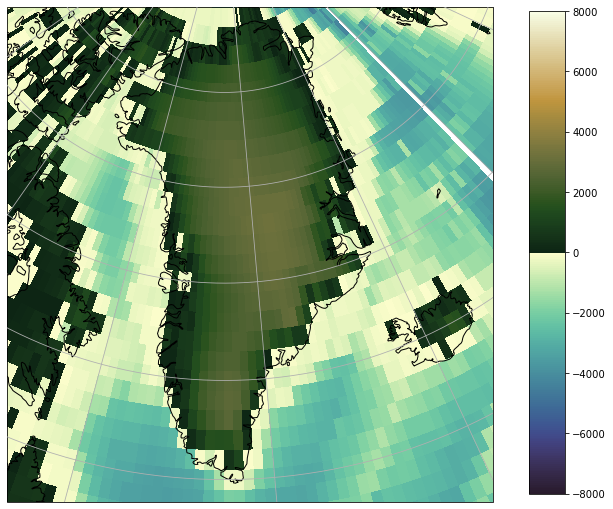

In [31]:
plot_gre(ds.lon,ds.lat,ds.z,
         cmin=-8000,cmax=8000,cmap=cm.cm.topo,
        title='Greenland Ice Sheet',
        clabel='Elevation (m)')

## AIS

In [25]:
def plot_ant(lon,lat,z,cmin=0,cmax=1,title='',cmap='viridis',clabel=''):
    fig = plt.figure(figsize=(10,10), facecolor='w')
    theta = np.linspace(0, 2*np.pi, 100);center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T;circle = mpath.Path(verts * radius + center)
    ax1 = plt.subplot(1, 1, 1, 
                      # projection=ccrs.Robinson())
                        projection=ccrs.SouthPolarStereo())
    ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
    ax1.coastlines(resolution='110m', zorder=3,color='grey') # zorder=3 makes sure that no other plots overlay the coastlines
    ax1.gridlines()
    ax1.set_boundary(circle, transform=ax1.transAxes)
    cp=plt.pcolormesh(lon,lat,
                    z,
                    # cmap='twilight',
                cmap=cmap,
                vmin=cmin,vmax=cmax,
                    #extent=(0,1,0,1), origin='lower',
                transform=ccrs.PlateCarree()
                )
    plt.title(title)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.17, 0.05, 0.67])
    cbar=fig.colorbar(cp, cax=cbar_ax)
    cbar.set_label(label=clabel,size=14, family='serif')

    plt.show()   
    return

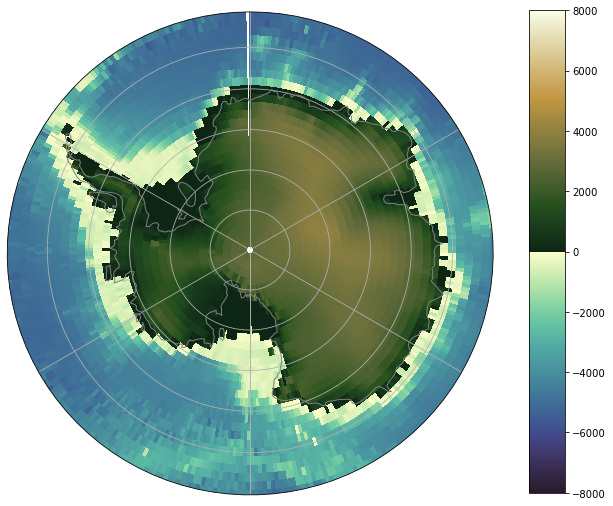

In [26]:
plot_ant(ds.lon,ds.lat,ds.z,
         cmin=-8000,cmax=8000,cmap=cm.cm.topo,
        title='Greenland Ice Sheet',
        clabel='Elevation (m)')